Привет, Гузель!

Меня зовут Вячеслав Погорелый, и я буду проводить ревью твоего проекта. 

Предлагаю перейти на "ты", если не против)

Но если это не удобно - дай знать, и мы перейдем на "вы". Моя главная задача — не находить сделанные тобою ошибки, а передать свой опыт и помочь тебе стать аналитиком данных.

Я отметил комментарии и замечания разным цветом далее по тексту markdown:

---    
<div class="alert alert-block alert-danger">
    
### Ошибка
    
Критическое замечание, которые следует исправить.
</div> 
    
---
    
<div class="alert alert-block alert-warning">
    
### Совет
    
Замечание\совет на будущее.
</div>
    
---
    
<div class="alert alert-block alert-success">
    
### Успех
    
Когда всё сделано правильно.
</div>
    
    
    
Будет здорово, если для ответов ты выберешь любой **<font color="maroon">читабельный и заметный цвет</font>**, так мне будет проще все проверить.


При доработке проекта попрошу тебя сохранить и не видоизменять заметки ревьюера, это осложняет повторную проверку.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Спасибо тебе за оформление оглавления к проекту.

## Исследование данных о российском кинопрокате



### Шаг 1. Откроем файлы с данными и объединим их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd
import matplotlib as plt
pd.options.mode.chained_assignment = None #на этапе обработки пропусков у меня возникало предупреждение, нашла в интернете вот такое решение
import missingno as msno
import numpy as ny

In [2]:
data = pd.read_csv('/datasets/mkrf_movies.csv')
data_shows = pd.read_csv('/datasets/mkrf_shows.csv')

data.info() #посмотрим информацию о датасетах
data_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Таблицы можно объединить по столбцу *puNumber*, однако видим, что в разных таблицах разные типы данных этого столбца. Необходимо в первой таблице привести данные к числовому типу

In [3]:
#при запуске кода возникает ошибка, у нас есть проблемная строка со значением 'нет' 

data = data.query('puNumber != "нет"') #избавимся от этой строки и вновь попробуем запустить код

data['puNumber'] = data['puNumber'].astype(int)

data = data.merge(data_shows, on='puNumber', how='left') #объединим таблицы и выведем результат

data

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7480,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7481,Звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN
7482,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7483,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Мы объединили две таблицы в один датафрейм, который состоит из 7485 строк и 16 столбцов. У нас есть информация из реестра прокатных удостоверений, а также сведения о показах фильмов в российских кинотеатрах.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Первичная инфомрация о данных получена и проект сохрнен в переменные. 

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверим типы данных

- Проверим типы данных в датафрейме и преобразуем их там, где это необходимо.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Изменим формат на datetime, так как столбец *show_start_date* содержит время

In [5]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S')
data['show_start_date']

0      2015-11-27 12:00:00+00:00
1      2016-09-13 12:00:00+00:00
2      2016-10-10 12:00:00+00:00
3      2016-06-10 12:00:00+00:00
4      2015-07-29 12:00:00+00:00
                  ...           
7480   2019-12-23 12:00:00+00:00
7481   2019-12-24 12:00:00+00:00
7482   2019-12-28 12:00:00+00:00
7483   2019-12-30 12:00:00+00:00
7484   2019-12-30 12:00:00+00:00
Name: show_start_date, Length: 7485, dtype: datetime64[ns, UTC]

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Классный способ использован для перевода данные в формат даты 

Столбец с рейтингом необходимо преобразовать в вещественный тип. Для начала расссмотрим уникальные значения этого столбца

In [6]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

В большинстве случаев рейтинг отображен корректно, однако встречаются значения в процентах. Допустим, что значения в процентах используются для отображения рейтинга, в таком случае переведем процентные значения в общую шкалу

In [7]:
data['ratings'] = data['ratings'].str.replace('%', '').astype('float')  
data['ratings'].unique()

array([ 7.2,  6.6,  6.8,  7.7,  8.3,  8. ,  7.8,  8.1,  7.1,  6. ,  7.4,
        5.8,  8.7,  6.3,  6.9,  5. ,  4.3,  7.3,  7. ,  6.4,  nan,  8.2,
        7.5,  6.7,  7.9,  5.9,  6.2,  5.6,  6.5,  2.4,  7.6,  6.1,  8.6,
        8.5,  8.8,  5.5,  5.1,  5.7,  5.4, 99. ,  4.4,  4.5,  5.3,  4.1,
        8.4,  2.6,  3.8,  4.6,  4.8,  4. ,  3. ,  1.6,  4.2,  5.2,  4.7,
        4.9,  3.9,  2.7,  3.3,  2.9, 28. ,  3.7,  1.4,  3.1, 97. ,  3.5,
        3.2,  2.8,  1.5,  2.1,  2.5,  9.2,  3.4,  1.1,  3.6, 83. , 64. ,
       91. , 94. , 62. , 79. , 90. , 19. , 88. ,  1. , 89. ,  1.3,  1.9,
        1.8,  1.2,  1.7,  9. , 98. ,  8.9,  9.1])

In [8]:
ratings_high = data.loc[data['ratings'] > 10]
data.loc[data['ratings'] > 10, 'ratings'] = ratings_high['ratings']/10
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
С типом данных вопрос решен 

#### Шаг 2.2. Изучим пропуски в датафрейме

In [9]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

<AxesSubplot:>

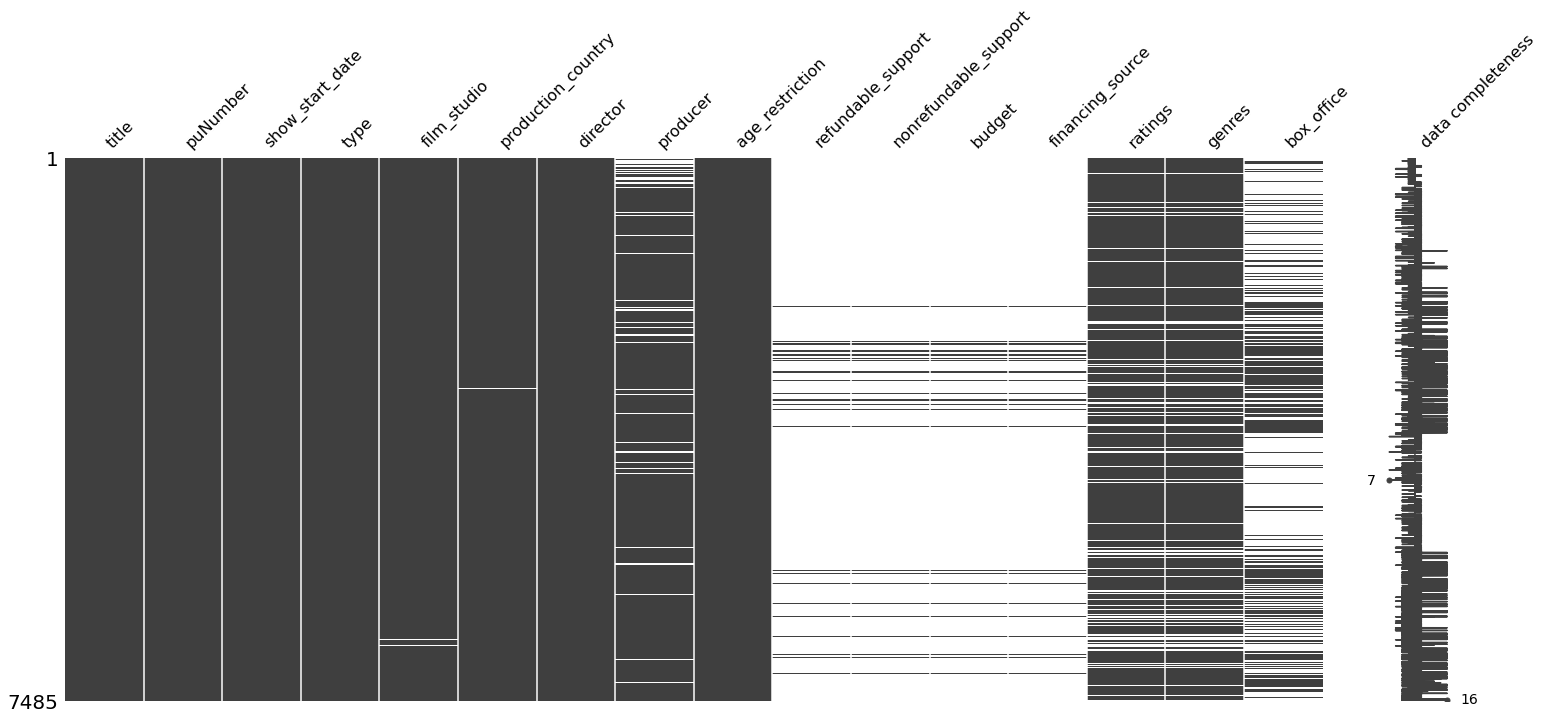

In [10]:
msno.matrix(data, labels=True)

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Для визуализации пропусков используй  https://russianblogs.com/article/5001266235/

**Cтудия-производитель**

Мы видим, что у нас довольно маленькое количество пропусков студии-производителя, скорее всего данные изначально не были заполнены. Можем удалить строки с пропусками в данном столбце, так как на дальнейший анализ данных это не повлияет значительно

In [11]:
data = data.dropna(subset=['film_studio'])

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Согласен. Пропусков мало и логично избавиться от них. 

**Продюсер**

In [12]:
producer_percentage = data['producer'].isna().sum()/len(data)
print(f'Пропусков продюсера: {producer_percentage:.2%}')

Пропусков продюсера: 7.59%


Пропусков в столбце с именем продюсера фильма около 8%. Можем заменить пропуски на категорию "Нет продюсера"

In [13]:
data['producer'] = data['producer'].fillna('Нет продюсера')

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Значение-заглушка это отличное решение. 

**Объём средств государственной поддержки, источник финансирования и бюджет**

In [14]:
refundable_support_percentage = data['refundable_support'].isna().sum()/len(data)
print(f'Пропусков возвратных средств государственной поддержки: {refundable_support_percentage:.2%}')

Пропусков возвратных средств государственной поддержки: 95.55%


Мы видим большой процент пропущенных значений в столбце с объемом возвратных средств государственной поддержки. Также изначально при анализе количества пропусков было обнаружено одинаковое количество пропущенных значений в столбцах с возвратными и невозвратными средствами, общим бюджетом фильма и источником государственного финансирования. Проверим, совпадают ли эти строки

In [15]:
print(
    len(data.loc[(data['refundable_support'].isna())&
    (data['nonrefundable_support'].isna())&
    (data['budget'].isna())&
    (data['financing_source'].isna())])
)

7135


Строки совпадают, это означает, что бюджет фильмов в датафрейме представлен только в тех картинах, где есть средства государственной поддержки. Пропуски в данных столбцах говорят о том, что источником финансирования не были Министерство культуры или Фонд кино. Учитывая это, заменим пропуски в источниках на "другой источник финансирования".

In [16]:
data['financing_source'] = data['financing_source'].fillna('Другой источник финансирования')

**Страна производитель и режиссёр**

Так как пропусков в данных столбцах довольно мало (2 и 9), то удалим строки с пропусками

In [17]:
data = data.dropna(subset=['director'])
data = data.dropna(subset=['production_country'])

**Рейтинг фильма на КиноПоиске**

Мы не можем заменить пропуски средними значениями, так как это будет некорректно. Скорее всего пропуски говорят о том, что на КиноПоиске недостаточно оценок для выставления рейтинга. В таком случае заменим пропуски на 0, это будет говорить нам о том, что у фильма нет рейтинга

In [18]:
data['ratings'] = data['ratings'].fillna(0)

**Жанр фильма**

Заменим пропуски на категорию "Нет жанра"

In [19]:
data['genres'] = data['genres'].fillna('Без жанра')

**Сборы в рублях**

Заполним пропуски нолями, так как заменить их другим корректным способом не выйдет. Пропуски могут говорить о том, что фильм не вышел в прокат

In [20]:
data['box_office'] = data['box_office'].fillna(0)

Остальные пропуски обработаем при следующих шагах. Проверим финально пропуски

In [21]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       7126
nonrefundable_support    7126
budget                   7126
financing_source            0
ratings                     0
genres                      0
box_office                  0
dtype: int64

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
С пропусками здорово справились. 

#### Шаг 2.3. Изучим дубликаты в датафрейме
- Проверим, есть ли в данных дубликаты. Опишем причины, которые могли повлиять на появление дублей.

In [22]:
data.duplicated().sum()

0

Мы видим, что полных совпадений нет. В таком случае проверим совпадают ли фильмы по номеру прокатного удостоверения

In [23]:
data['puNumber'].value_counts()

221154310    2
221054410    2
122001411    1
121017119    1
114002716    1
            ..
121013618    1
121017712    1
211019118    1
121009516    1
126002916    1
Name: puNumber, Length: 7456, dtype: int64

In [24]:
data.query('puNumber == 221054410')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5066,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Другой источник финансирования,7.4,"комедия,криминал",0.0
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,Другой источник финансирования,6.8,"комедия,криминал",0.0


Два разных фильма имеют одинаковый номер прокатного удостоверения, возможно произошла ошибка при его выдаче. Заменим один из них на другой рандомный номер для дальнейшего анализа данных

In [25]:
data.loc[(data['puNumber'] == 221054410)&(data['title'] == 'Анализируй это!'), 'puNumber'] = 1000000

Сделаем то же самое, но с другим номером

In [26]:
data.query('puNumber == 221154310')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Другой источник финансирования,7.0,"мелодрама,комедия",0.0
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Другой источник финансирования,7.6,"драма,мелодрама,история",0.0


In [27]:
data.loc[(data['puNumber'] == 221154310)&(data['title'] == 'Как жениться и остаться холостым'), 'puNumber'] = 1000001

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
На явные и неявные дубли проверку сделали 

#### Шаг 2.4. Изучим категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

**Тип фильма**

Посмотрим на уникальные значения в столбце типа фильма

In [28]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Видим наличие пробелов в названиях, поэтому избавимся от них

In [29]:
data['type'] = data['type'].str.strip()
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

**Возрастная категория**

In [30]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

С данными все в порядке

**Источник государственного финансирования**

In [31]:
data['financing_source'].unique()

array(['Другой источник финансирования', 'Министерство культуры',
       'Фонд кино', 'Министерство культуры, Фонд кино'], dtype=object)

С источником финансирования также проблем нет

В категориальных столбцах мы столкнулись с проблемой, когда встречаются одинаковые значения, но с разным написанием. В связи с этим мы удалили лишние пробелы в названиях

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
Тут стоит резюмировать какая общая пробщема есть у почти всех категориальных столбцов. 

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Исправлено 

#### Шаг 2.5. Проверим количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

Мы уже выяснили, что информация о бюджете фильма не заполнена только у тех картин, которым не была оказана государственная поддержка. Тогда попытаемся разобраться в тех случаях, когда государственная поддержка была, а бюджет не заполнен. 

In [32]:
data.corr()['budget'].sort_values(ascending=False)

budget                   1.000000
refundable_support       0.641224
nonrefundable_support    0.594169
box_office               0.349337
ratings                  0.122406
puNumber                -0.019794
Name: budget, dtype: float64

Объем государственной поддержки достаточно сильно коррелируют с бюджетом фильма. Поэтому заменим пропуски с помощью среднего коэффициента 

In [33]:
support_factor = data.query('financing_source != "Другой источник финансирования"')

support_factor = (support_factor['refundable_support'] + support_factor['nonrefundable_support'])/support_factor['budget']

support_factor = support_factor.median().round(2) #найдем средний коэффициент отношения гос.поддержки к бюджету

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Тут отлично. Согласен. 

In [34]:
#заменим пропуски
data.loc[data['budget'] == 0.0, 'budget'] = ((data['refundable_support'] + data['nonrefundable_support'])/support_factor).round(1)

In [35]:
data.query('financing_source != "Другой источник финансирования"').head(20)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",365353.6
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,0.0,Без жанра,28140.0
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",19957031.5
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,55917.5
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,232100.0
1853,Тайна Сухаревой башни. Чародей равновесия,114000115,2015-02-18 12:00:00+00:00,Анимационный,"ООО ""Студия ""Мастер-Фильм""",Россия,С.Серегин,А.Герасимов,«6+» - для детей старше 6 лет,0.0,25000000.0,51850000.0,Министерство культуры,6.1,"мультфильм,фэнтези,история",15078858.6
1869,А зори здесь тихие..._,111002915,2015-03-16 12:00:00+00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,Нет продюсера,«12+» - для детей старше 12 лет,50000000.0,100000000.0,220588394.0,Фонд кино,8.5,"драма,военный,история",249166767.7
1870,Две женщины,111013714,2014-10-02 12:00:00+00:00,Художественный,"ООО ""Продюсерский Центр ""Хорошо Продакшн"", Rez...","Россия, Франция, Латвия",В.Глаголева,Н.Иванова,«12+» - для детей старше 12 лет,0.0,46502299.0,86210067.0,"Министерство культуры, Фонд кино",6.7,драма,4731239.5
1902,Призрак_.,111001815,2015-03-02 12:00:00+00:00,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,«6+» - для детей старше 6 лет,0.0,75000000.0,139551503.0,Фонд кино,7.0,"триллер,боевик,приключения",352804320.4
1911,Ведьма .,111002215,2015-03-05 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""Ракурс""",Россия,Д.Федоров,В.Сидоренко,«16+» - для детей старше 16 лет,0.0,34000000.0,48571430.0,Министерство культуры,7.4,"фэнтези,приключения,драма",51907.5


Теперь заменим пропуски на 0 в столбцах с бюджетом и гос.поддержкой. Так как другим способом пропуски уже не заполнить

In [36]:
for col in data.columns:
    data[col] = data[col].fillna(0)
data

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,0.0,Другой источник финансирования,7.2,"боевик,драма,мелодрама",0.0
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Нет продюсера,«6+» - для детей старше 6 лет,0.0,0.0,0.0,Другой источник финансирования,6.6,"драма,военный",0.0
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,Другой источник финансирования,6.8,"фантастика,боевик,триллер",0.0
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,Другой источник финансирования,6.8,"фантастика,боевик,триллер",0.0
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,Другой источник финансирования,6.8,"фантастика,боевик,триллер",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7480,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,0.0,0.0,0.0,Другой источник финансирования,0.0,Без жанра,0.0
7481,Звериная ярость,121037819,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,0.0,0.0,0.0,Другой источник финансирования,5.4,"боевик,триллер",0.0
7482,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,0.0,0.0,0.0,Другой источник финансирования,0.0,Без жанра,0.0
7483,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,0.0,0.0,0.0,Другой источник финансирования,0.0,Без жанра,0.0


<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Это можно реализовать при помощи цикла, чтобы не копипастить одинаковый код.

#### Шаг 2.6. Добавим новые столбцы

- Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [37]:
data['year'] = data['show_start_date'].dt.year
data['year']

0       2015
1       2016
2       2016
3       2016
4       2015
        ... 
7480    2019
7481    2019
7482    2019
7483    2019
7484    2019
Name: year, Length: 7458, dtype: int64

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Ты используешь удобный метод выделения года из данных. 

- Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [38]:
def new_column(data, columns): #создадим функцию для создания столбцов с первыми значениями режиссера и жанра
    for column in columns:
        data[f'new_{column}'] = data[column].str.split(',').str[0]
    return data
 
data = new_column(data, ['director']) #применим функцию
data = new_column(data, ['genres'])
data

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,new_director,new_genres
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,0.0,Другой источник финансирования,7.2,"боевик,драма,мелодрама",0.0,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Нет продюсера,«6+» - для детей старше 6 лет,0.0,0.0,0.0,Другой источник финансирования,6.6,"драма,военный",0.0,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,Другой источник финансирования,6.8,"фантастика,боевик,триллер",0.0,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,Другой источник финансирования,6.8,"фантастика,боевик,триллер",0.0,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,Другой источник финансирования,6.8,"фантастика,боевик,триллер",0.0,2015,Тимур Бекмамбетов,фантастика
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7480,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,0.0,0.0,0.0,Другой источник финансирования,0.0,Без жанра,0.0,2019,Фил Грабски,Без жанра
7481,Звериная ярость,121037819,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,0.0,0.0,0.0,Другой источник финансирования,5.4,"боевик,триллер",0.0,2019,Ник Пауэлл,боевик
7482,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,0.0,0.0,0.0,Другой источник финансирования,0.0,Без жанра,0.0,2019,Чарльз Е.Бастьен,Без жанра
7483,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,0.0,0.0,0.0,Другой источник финансирования,0.0,Без жанра,0.0,2019,А.Беляев,Без жанра


- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [39]:
print(f'Доля гос.поддержки от общего бюджета фильма {support_factor:.1%}')

Доля гос.поддержки от общего бюджета фильма 61.0%


Мы провели предобработку данных, в ходе которой: 

- заполнили пропуски в данных
- изучили дубликаты в датафрейме
- изучили категориальные значения и исправили проблему с уникальными значениями
- изменили тип данных на подходящий
- указали возможные причины пропусков
- добавили новые столбцы в таблицу для дальнейшего анализа:


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Супер. Теперь данные готовы к дальнейшему анализу

### Шаг 3. Проведем исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

Рассмотрим срез данных, в котором есть информация о сборах в прокате и посчитаем количество таких фильмов

<AxesSubplot:title={'center':'Фильмы, вышедшие в прокат'}, xlabel='year'>

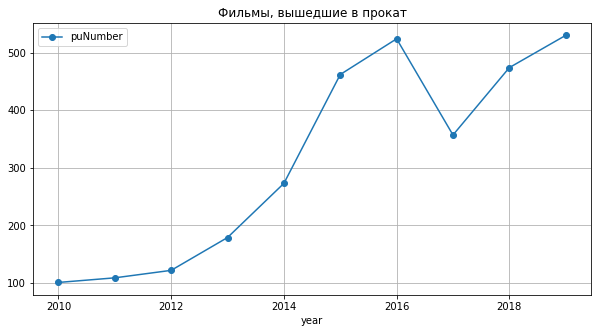

In [40]:
(
data.query('box_office > 0')
    .pivot_table(index='year', values='puNumber', aggfunc='count')
    .plot(grid=True, style='o-', figsize=(10, 5), title='Фильмы, вышедшие в прокат')
)

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
Все хорошо, но давай привыкнем оформлять графики правильно. Не забывай давать им названия. Сделать это можно командой title() 

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Вот теперь другое дело

In [41]:
(data.query('box_office > 0')
    .pivot_table(index='year', values='puNumber', aggfunc='count')
    .sort_values(by='puNumber', ascending = False)
)

,puNumber
year,
2019,530
2016,524
2018,474
2015,462
2017,357
2014,273
2013,179
2012,122
2011,109


С 2010 года начинается рост количества фильмов, которые выходили в прокат. Одним из пиков становится 2016 год. Затем в 2017 году идет резкое снижение, однако сразу после значения снова начинают расти. Пиком становится 2019 год, где количество фильмов, вышедших в прокат, становится максимальным: 530. 

In [42]:
box_office_part = round(len(data.query('box_office > 0'))/len(data), 2)
print(f'Доля фильмов в прокате {box_office_part:.1%}')

Доля фильмов в прокате 42.0%


Доля фильмов с указанной информацией о прокате в кинотеатрах составила 42%. Это меньше половины из всех данных нашего датафрейма. Рассмотрим также динамику изменения доли таких фильмов

In [43]:
df = (data.query('box_office > 0') #создадим новый датафрейм с данными о фильмах, вышедших в прокат
    .pivot_table(index='year', values='puNumber', aggfunc='count')
    .sort_values(by='puNumber', ascending = False)
)
#добавим столбцы с информацией об общем количестве фильмов за год и процентом доли фильмов, вышедших в прокат
df['films'] = data.pivot_table(index='year', values='puNumber', aggfunc='count').sort_values(by='puNumber', ascending = False)
df['percent'] = round(df['puNumber']/df['films'], 2) * 100

df['percent'].sort_values()

year
2010    10.0
2011    18.0
2012    21.0
2013    28.0
2014    34.0
2018    54.0
2019    57.0
2016    64.0
2015    66.0
2017    71.0
Name: percent, dtype: float64

Наиболее полно представлены данные за 2017 год. 71% - доля фильмов вышедших в прокат за этот год. Также много информации есть за 2015 и 2016 года. Меньше всего информации о прокатах фильмов есть за 2010 год - 10%. Однако с 2010 года шел стабильный рост. Резкий спад же произошел в 2018 году, с 71% до 54%

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
С выводом согласен. Отлично вышло. 

- Изучим, как менялась динамика проката по годам

In [44]:
data['box_office'] = data['box_office'].astype('int')

In [45]:
data.pivot_table(index='year', values='box_office', aggfunc='sum').sort_values(by='box_office', ascending=False)

,box_office
year,
2018,49668361724
2017,48563707214
2019,48425708592
2016,47866105069
2015,39497365062
2014,7444951839
2013,29799704
2011,14102765
2012,6911073


<AxesSubplot:title={'center':'Динамика проката по годам'}, xlabel='year'>

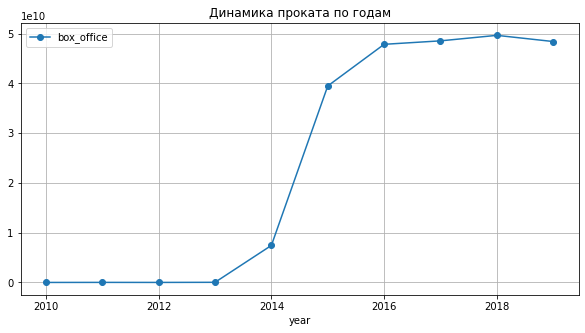

In [46]:
(
data
    .pivot_table(index='year', values='box_office', aggfunc='sum')
    .plot(grid=True, style='o-', figsize=(10, 5), title='Динамика проката по годам')
)

С 2013 года начался рост в увеличении суммы сборов. Максимум был достигнут в 2018 году - 49 млрд. рублей было собрано в прокате. Самый сильный скачок произошел в с 2014 по 2015 год: сборы увеличились с 7 млрд. до 39 млрд. Минимум же пришелся на 2010 год - 2 млн. рублей.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
И здесь нечего добавить. 

- С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [47]:
(
data
    .query('box_office > 0')
    .pivot_table(index='year', values='box_office', aggfunc=['mean', 'median']).astype('int')
)

,mean,median
,box_office,box_office
year,,
2010,24046,1710
2011,129383,3000
2012,56648,6110
2013,166478,3580
2014,27270885,20400
2015,85492132,5003449
2016,91347528,3957926
2017,136032793,9968340


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Медианные показатели сборов значительно ниже средних. 

<AxesSubplot:title={'center':'Средняя и медианная сумма сборов'}, xlabel='year'>

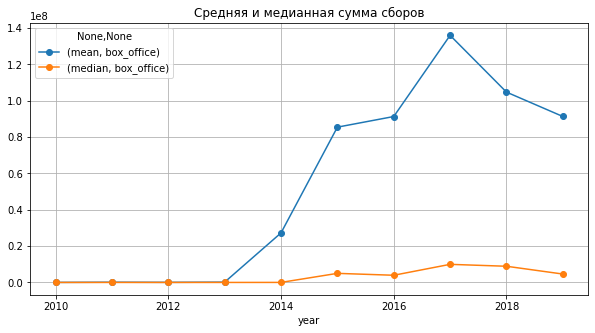

In [48]:
(
data
    .query('box_office > 0')
    .pivot_table(index='year', values='box_office', aggfunc=['mean', 'median']).astype('int')
    .plot(grid=True, style='o-', figsize=(10, 5), title='Средняя и медианная сумма сборов')
)

По графику мы видим, что с 2013 года начало увеличиваться среднее по сборам фильмов в прокате. Пик пришелся на 2017 год. При этом медиана не увеличилась значительно с годами

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [49]:
(
data.query('(year >= 2015)&(year <= 2019)')
    .pivot_table(index='age_restriction', columns='year', values='box_office', aggfunc='sum', margins=True)
    .sort_values(by='All', ascending=False)
)

year,2015,2016,2017,2018,2019,All
age_restriction,,,,,,
All,39497365062,47866105069,48563707214,49668361724,48425708592,234021247661
«16+» - для детей старше 16 лет,11368120823,16664548492,18745042899,16503602284,12753418927,76034733425
«12+» - для детей старше 12 лет,13616081989,12204446503,7851427659,14267250411,12680198743,60619405305
«6+» - для детей старше 6 лет,8701799354,12053145991,12086142145,10104974592,12852548618,55798610700
«18+» - запрещено для детей,5432308329,6793929771,9651495581,8760085436,10121796238,40759615355
«0+» - для любой зрительской аудитории,379054567,150034312,229598930,32449001,17746066,808882876


<AxesSubplot:title={'center':'Влияние возрастного ограничения на сумму сборов'}, xlabel='year'>

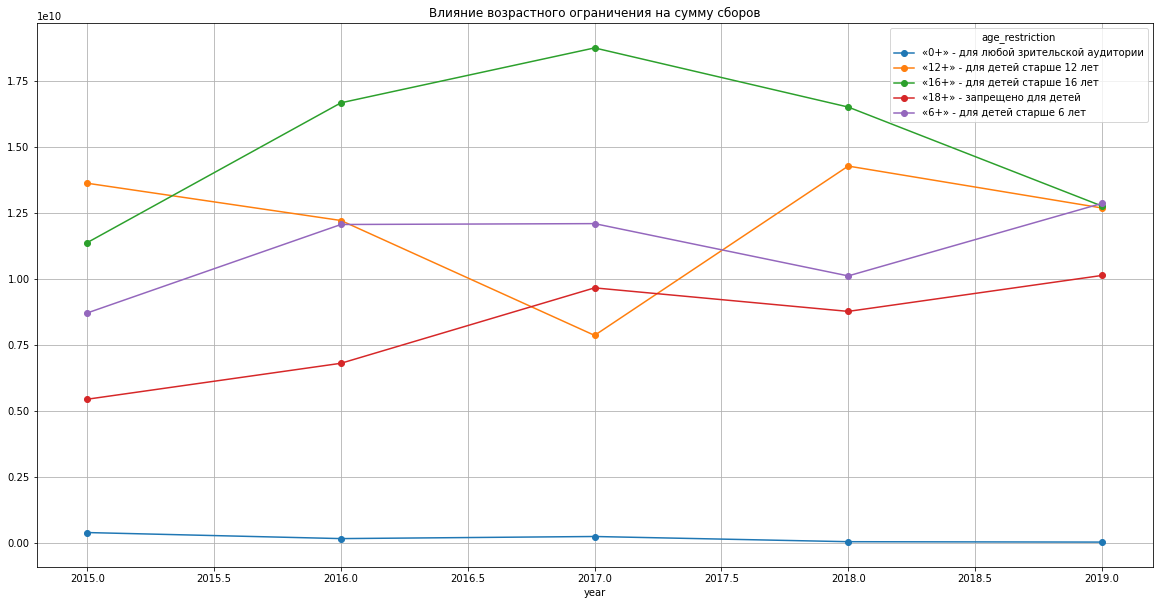

In [50]:
(
data.query('(year >= 2015)&(year <= 2019)')
    .pivot_table(index='year', columns='age_restriction', values='box_office', aggfunc='sum')
    .plot(grid=True, style='o-', figsize=(20, 10), title='Влияние возрастного ограничения на сумму сборов')
)

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Категория +16 является явным лидером среди других.

Мы видим, что суммарно с 2015 по 2019 год больше всего денег в прокате набрали фильмы с рейтингом 16+, на втором месте фильмы 12+, затем 6+ и 18+, а наименьшее количество собрали фильмы с рейтингом 0+. При этом фильмы 16+ набирали наибольшее количество денег в 2016, 2017 и 2018 годах, а затем пошли на спад. Возможно увеличилось производство фильмов с данным рейтингом, что повлияло на аудиторию. При этом идет рост фильмов 12+ и 6+. Можем предположить увеличение спроса на категорию фильмов для всей семьи

### Шаг 4. Исследуем фильмы, которые получили государственную поддержку


Посмотрим, какой процент фильмов в нашем датафрейме был снят при поддержке государства. 

In [51]:
financing_source_support = len(data.query('financing_source != "Другой источник финансирования"'))/len(data)
print(f'Количество фильмов при поддержке государства {financing_source_support:.2%}')

Количество фильмов при поддержке государства 4.45%


Также посмотрим на средние значения возвратных и невозвратных средств государственной поддержки

In [52]:
data['refundable_support'].mean().round(2)

528157.68

In [53]:
data['nonrefundable_support'].mean().round(2)

2180435.55

А также посмотрим на информацию по сборам фильмов, вышедших в прокат при поддержке государства

In [54]:
data_government_support = data.query('financing_source != "Другой источник финансирования"')

data_government_support['box_office'].mean()

126847920.12650603

<AxesSubplot:>

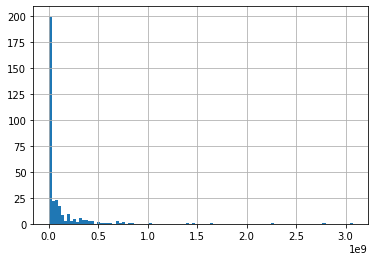

In [55]:
data_government_support['box_office'].hist(bins=100)

Посмотрим также на информацию по сборам фильмов, вышедших в прокат при альтернативном источнике финансирования

In [56]:
data_other_source = data.query('financing_source == "Другой источник финансирования"')
data_other_source['box_office'].mean()

27982870.083356723

Количество фильмов, снятых при поддержке государства, оказалось не слишком большим, всего 4,45%. В среднем выделяют около 500 тыс. возвратных средств и 2 млн. невозвратных средств. В среднем фильмы при государственной поддержке собирают около 126 млн. при прокате фильмов. Однако крупных сборов довольно немного, исходя из графика преобладают сборы до 500 тыс. При этом фильмы с альтернативным источником финансирования в среднем собирают гораздо меньше - около 27 млн. 

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
По выводам на основе графиков тоже отлично. Рекомендую только графики верно оформить. 

**Категоризация сборов**

Для анализа окупаемости фильмов создадим функцию, которая категоризует сумму сборов с проката. Если бюджет фильма оказался больше, чем сумма сборов, то будем считать фильм провальным. Если наоборот, то успешным

In [57]:
def categorize_box_office(row): #создадим функцию для категоризации данных
    
    box_office = row['box_office']
    budget = row['budget']
    
    if box_office < budget: #если сборы меньше бюджета, то фильм провалился
        return 'провал'
    else:
        return 'успех'
    
data['box_office_category'] = data.apply(categorize_box_office, axis=1)

print(data['box_office_category'])

0       успех
1       успех
2       успех
3       успех
4       успех
        ...  
7480    успех
7481    успех
7482    успех
7483    успех
7484    успех
Name: box_office_category, Length: 7458, dtype: object


Рассмотрим полученные данные в срезе фильмов с государственной поддержкой

In [58]:
data_government_support = data.query('financing_source != "Другой источник финансирования"')
success_rate = len(data_government_support.query('box_office_category == "успех"'))/len(data_government_support)
print(f'Процент успешных фильмов при поддержке государства {success_rate:.2%}')

Процент успешных фильмов при поддержке государства 21.99%


In [59]:
fail_rate = len(data_government_support.query('box_office_category == "провал"'))/len(data_government_support)
print(f'Процент неуспешных фильмов при поддержке государства {fail_rate:.2%}')

Процент неуспешных фильмов при поддержке государства 78.01%


Мы можем увидеть, что фильмы при господдержке чаще проваливаются в прокате. Доля таких фильмов составила 78%. Успешных фильмов при этом всего 22%

**Анализ жанров фильмов**

Составим сводную таблицу, чтобы посмотреть наиболее популярные для производства жанры фильмов с господдержкой

In [60]:
data_government_support.pivot_table(index='new_genres', values='puNumber', aggfunc='count').sort_values(by='puNumber', ascending=False)

,puNumber
new_genres,
драма,93
комедия,74
мультфильм,31
Без жанра,16
триллер,15
мелодрама,15
фантастика,11
фэнтези,11
ужасы,10


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Среди лидеров достаточно предсказуемые жанры оказались 

Большинство фильмов при поддержке государтсва сняты в жанрах драмы и комедии. При этом самыми непопулярными жанрами для спонсирования являются спорт, реальное ТВ, криминал, мюзикл и детский. 

Создадим сводную таблицу, чтобы посмотреть, в каких жанрах больше успешных или провальных фильмов в прокате

In [61]:
data_government_support.pivot_table(index='new_genres', columns='box_office_category', values='puNumber', aggfunc='count')

box_office_category,провал,успех
new_genres,,
Без жанра,15.0,1.0
биография,2.0,1.0
боевик,4.0,2.0
военный,6.0,3.0
детектив,5.0,NaN
детский,4.0,NaN
драма,79.0,14.0
история,3.0,1.0
комедия,45.0,29.0


Рассмотрим фильмы, которые провалились в прокате более подробно. Посчитаем отношение таких фильмов к общему количеству картин в определенном жанре, снятых при поддержке государства

In [62]:
data_government_support_pivot = data_government_support.pivot_table(index='new_genres', columns='box_office_category', values='puNumber', aggfunc='count')
data_government_support_pivot['успех'] = data_government_support_pivot['успех'].fillna(0)
data_government_support_pivot['fail_percent'] = data_government_support_pivot['провал']/(data_government_support_pivot['провал'] + data_government_support_pivot['успех'])
data_government_support_pivot['fail_percent'].round(2).sort_values(ascending=False)

new_genres
мелодрама      1.00
криминал       1.00
реальное ТВ    1.00
мюзикл         1.00
детектив       1.00
детский        1.00
Без жанра      0.94
фэнтези        0.91
триллер        0.87
приключения    0.86
драма          0.85
фантастика     0.82
история        0.75
мультфильм     0.74
ужасы          0.70
биография      0.67
военный        0.67
боевик         0.67
комедия        0.61
семейный       0.57
спорт          0.33
Name: fail_percent, dtype: float64

Мы видим, что наименее перспективными в сборах оказались фильмы в жанрах мелодрамы, криминала, реального ТВ, мюзикла, детектива и детского кино. В данных жанрах не оказалось фильмов, которые были бы успешными в прокате. Также рассмотрим фильмы, которые наоборот оказались успешными в сборах

In [63]:
data_government_support_pivot['success_percent'] = data_government_support_pivot['успех']/(data_government_support_pivot['провал'] + data_government_support_pivot['успех'])
data_government_support_pivot['success_percent'].round(2).sort_values()

new_genres
мелодрама      0.00
реальное ТВ    0.00
мюзикл         0.00
криминал       0.00
детектив       0.00
детский        0.00
Без жанра      0.06
фэнтези        0.09
триллер        0.13
приключения    0.14
драма          0.15
фантастика     0.18
история        0.25
мультфильм     0.26
ужасы          0.30
военный        0.33
боевик         0.33
биография      0.33
комедия        0.39
семейный       0.43
спорт          0.67
Name: success_percent, dtype: float64

Лучшими можно считать жанры со спортивным, семейным, комедийным кино. Посмотрим на результаты в виде графика

<AxesSubplot:title={'center':'Сборы разных жанров фильмов'}, xlabel='new_genres'>

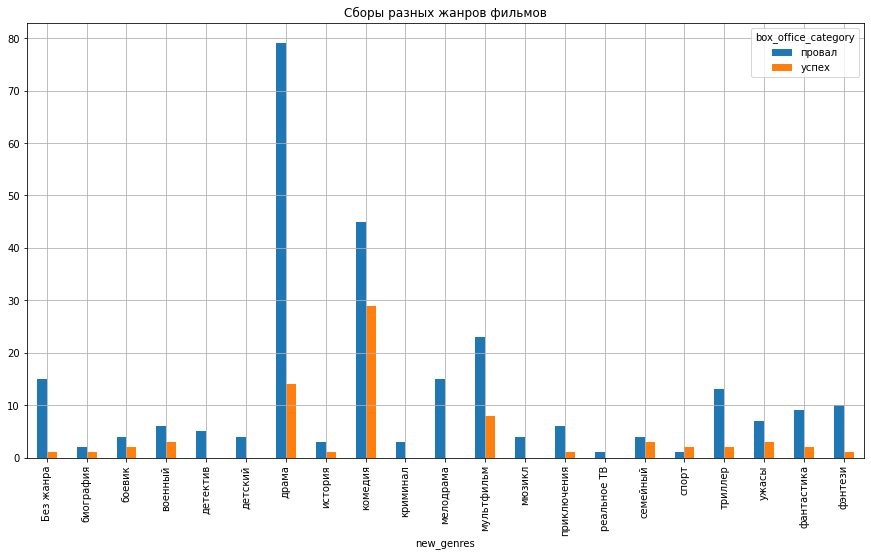

In [64]:
data_government_support.pivot_table(index='new_genres', columns='box_office_category', values='puNumber', aggfunc='count').plot(grid=True, kind='bar', figsize=(15, 8), title='Сборы разных жанров фильмов')

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Можно было сделать сортировку значений по убыванию. 

**Анализ типов фильмов**

In [65]:
data_government_support.pivot_table(index='type', values='puNumber', aggfunc='count').sort_values(by='puNumber', ascending=False)

,puNumber
type,
Художественный,300
Анимационный,31
Документальный,1


Чаще всего при поддержке государства снимаются художественные фильмы.

**Анализ рейтинга фильмов**

Проанализируем рейтинг фильмов, снятых при поддержке государства. Построим сводные таблицы для анализа сравнения средних рейтингов в зависимости от жанров, сборов, типа фильмов.

In [66]:
data_government_support.pivot_table(index='box_office_category', values='ratings', aggfunc='mean').sort_values(by='ratings', ascending=False).round(2)

,ratings
box_office_category,
успех,6.05
провал,5.64


Успешные фильмы в прокате имеют средний рейтинг на КиноПоиске: 6,05. А провальные 5,64

In [67]:
data_government_support.pivot_table(index='type', values='ratings', aggfunc='mean').round(2).sort_values(by='ratings', ascending=False)

,ratings
type,
Документальный,8.00
Художественный,5.74
Анимационный,5.56


Самый низкий средний рейтинг имеется у анимационных фильмов 5,56. Художественные фильмы имеют рейтинг 5,74. У нас есть только один документальный фильм, который имеет рейтинг 8. 

In [68]:
data_government_support.pivot_table(index='new_genres', values='ratings', aggfunc='mean').round(2).sort_values(by='ratings', ascending=False)

,ratings
new_genres,
криминал,7.50
детский,7.12
спорт,6.93
биография,6.90
детектив,6.76
боевик,6.58
мюзикл,6.55
военный,6.47
драма,6.42


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
А вот здесь лидеры оказались не из самых ожидаемых жарнов. 

Самый высокий рейтинг имеется у фильмов в жанрах: криминал, детский, спорт, биография, детектив и боевик. Худшими можно назвать жанры: ужасы, история, семейный  и комедия. Рассмотрим результаты на графике

<AxesSubplot:title={'center':'Рейтинг фильмов'}, xlabel='new_genres'>

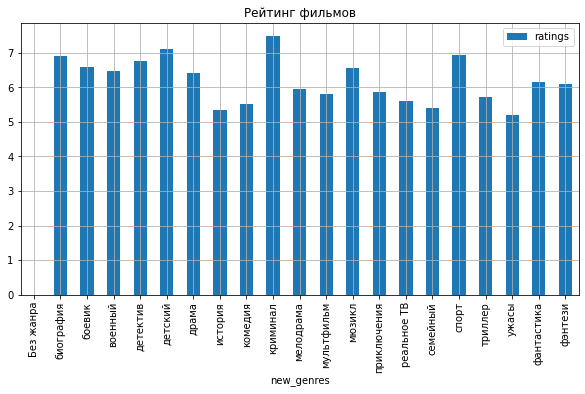

In [69]:
data_government_support.pivot_table(index='new_genres', values='ratings', aggfunc='mean').round(2).plot(grid=True, kind='bar', figsize=(10, 5), title='Рейтинг фильмов')

Исходя из графика можно увидеть, что рейтинги распределились достаточно равномерно. Нет жанров, которые бы значительно выделялись как в лучшую, так и в худшую сторону. 

**Сравнение с фильмами с другим источником финансирования**

Сравним также результаты с фильмами, которые были сняты при поддержке альтернативных источников

In [70]:
pivot_goverment = data_government_support.pivot_table(index='new_genres', values='ratings', aggfunc='mean').round(2)
pivot_goverment = pivot_goverment.rename(columns={'ratings': 'ratings_goverment'})

data_other_source = data.query('financing_source == "Другой источник финансирования"')

pivot_other = data_other_source.pivot_table(index='new_genres', values='ratings', aggfunc='mean').round(2)
pivot_other = pivot_other.rename(columns={'ratings': 'ratings_other'})

pivot = pd.merge(pivot_goverment, pivot_other, on='new_genres', how='left')

pivot

,ratings_goverment,ratings_other
new_genres,,
Без жанра,0.00,0.06
биография,6.90,7.02
боевик,6.58,6.51
военный,6.47,6.79
детектив,6.76,6.64
детский,7.12,5.89
драма,6.42,6.79
история,5.35,6.63
комедия,5.51,6.04


<AxesSubplot:title={'center':'Рейтинг фильмов с разным источником финансирования'}, xlabel='new_genres'>

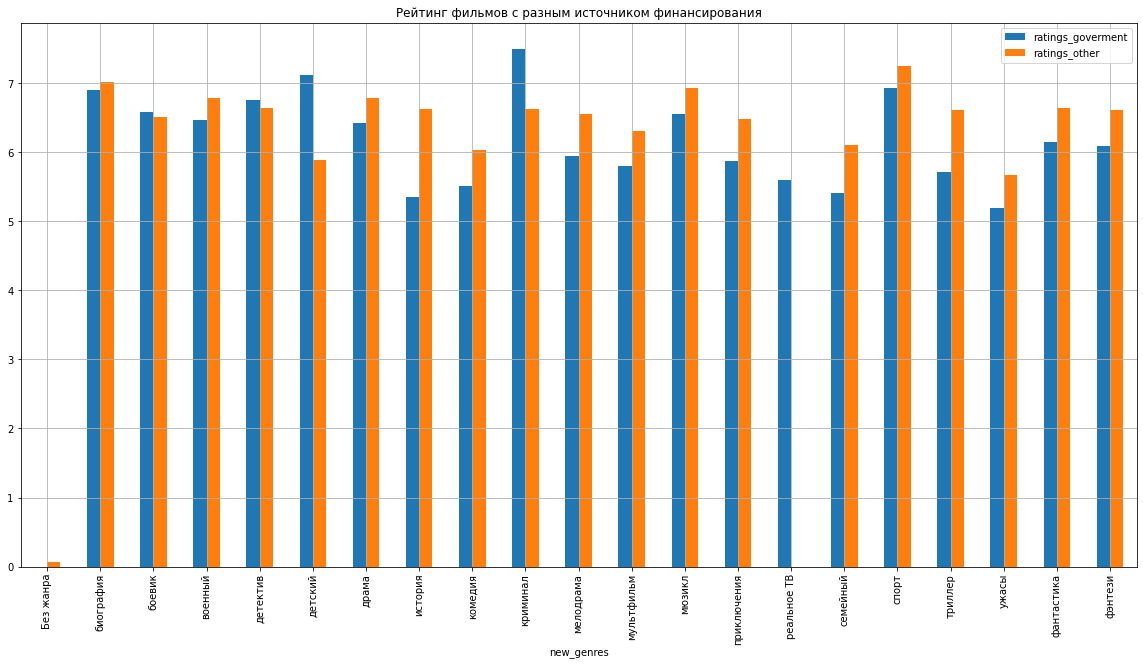

In [71]:
pivot.plot(grid=True, kind='bar', figsize=(20, 10), title='Рейтинг фильмов с разным источником финансирования')

Можем увидеть, что преимущество в рейтинге оказалось у фильмов, снятых при гос. поддержке, в жанрах: криминал, боевик, детектив, детский, в отличие от фильмов, снятых без поддержки государства. При этом большой отрыв при альтернативном источнике финансирования оказался у фильмов в жанрах: история, триллер, комедия, приключения.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Все так и есть

# Общий вывод

Мы провели исследование рынка российского кинопроката при помощи данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

**Целью исследования было определение текущих трендов кинопроката, а также анализ фильмов, снятых при государственной поддержке.**

*Этапы исследования и выводы:*

**1. Изучили общую информацию о данных.**

Мы объединили в единый датафрейм данные о прокатных удостоверениях и данные о прокате в российских кинотеатрах. Наш датафрейм состоял из 7485 записей. Было обнаружено большое количество пропущенных значений в столбцах, некорректный тип данных, аномальные значения.

**2. Выполнили предобработку данных**

- заполнили пропуски в данных
- изучили дубликаты в датафрейме
- изучили категориальные значения и исправили проблему с уникальными значениями
- изменили тип данных на подходящий
- указали возможные причины пропусков

**3. Добавили новые столбцы в таблицу для дальнейшего анализа**
- new_director – имя и фамилия главного режиссера
- new_genres – основной жанр фильма
- year – информация о годе проката

**4. Провели исследовательский анализ данных**

**4.1 Изучили фильмы, вышедшие в прокат, и проанализировали полноту этих данных по годам**

В нашем датасете доля фильмов с указанной информацией о прокате в кинотеатрах составила 42% от общего числа фильмов. При этом с 2010 года шел стабильный рост количества фильмов, которые выходили в прокат. Пиковым значением стал 2016 год. После резкого снижения в 2017 году информация о фильмах в прокате снова начала увеличиваться. Пиком становится 2019 год, где количество фильмов, вышедших в прокат, становится максимальным: 530. Наиболее полно представлены данные за 2017 год. 71% - доля фильмов вышедших в прокат за этот год. Также много информации есть за 2015 и 2016 года. Меньше всего информации о прокатах фильмов есть за 2010 год - 10%. Однако с 2010 года шел стабильный рост. Спад же произошел в 2018 году, с 71% до 54%

**4.2 Изучили динамику проката по годам**

С 2013 года начался рост в увеличении суммы сборов. Максимум был достигнут в 2018 году - 49 млрд. рублей. Самый сильный скачок произошел в 2015 году: сборы увеличились с 7 млрд. до 39 млрд. Минимум же пришелся на 2010 год - 2 млн. рублей.Также с 2013 года начало увеличиваться среднее по сборам фильмов в прокате. Пик пришелся на 2017 год. При этом медиана не увеличилась значительно с годами

**4.3 Изучили влияние возрастного ограничения аудитории на сборы фильма с 2015 по 2019 год**

Мы увидели, что суммарно с 2015 по 2019 год больше всего денег в прокате набрали фильмы с рейтингом 16+, на втором месте фильмы 12+, затем 6+ и 18+, а наименьшее количество собрали фильмы с рейтингом 0+. При этом фильмы 16+ набирали наибольшее количество денег в 2016, 2017 и 2018 годах, а затем пошли на спад. Возможно увеличилось производство фильмов с данным рейтингом, что повлияло на аудиторию. При этом идет рост фильмов 12+ и 6+. Можем предположить, что произошло увеличение спроса на категорию фильмов для всей семьи

**5. Исследовали фильмы, которые получили государственную поддержку**

**5.1 Изучили общую информацию**

Количество фильмов, снятых при поддержке государства, оказалось не слишком большим, всего 4,45%. В среднем выделяют около 500 тыс. возвратных средств и 2 млн. невозвратных средств. В среднем фильмы при гос. поддержке собирают около 126 млн. при прокате фильмов. Однако крупных сборов довольно немного, исходя из данных преобладают сборы до 500 тыс. При этом фильмы с альтернативным источником финансирования в среднем собирают гораздо меньше - около 27 млн.

**5.2 Изучили сборы фильмов в кинотеатрах**
Мы можем увидеть, что фильмы при господдержке чаще проваливаются в прокате. Доля таких фильмов составила 78%. Успешных фильмов при этом всего 22%

**5.3. Изучили жанры и типы таких фильмов**

Чаще всего при поддержке государства снимаются художественные фильмы. Большинство фильмов при этом сняты в жанрах драмы и комедии. При этом самыми непопулярными жанрами для спонсирования являются спорт, реальное ТВ, криминал, мюзикл и детский. Мы видим, что наименее перспективными в сборах оказались фильмы в жанрах мелодрамы, криминала, реального ТВ, мюзикла, детектива и детского кино. В данных жанрах не оказалось фильмов, которые были бы успешными в прокате. Также рассмотрели фильмы, которые наоборот оказались успешными в сборах. Лучшими можно считать жанры со спортивным, семейным, комедийным кино. 

**5.4 Изучили рейтинг фильмов**

Успешные фильмы в прокате имеют средний рейтинг на КиноПоиске: 6,05. А провальные 5,64. Самый низкий средний рейтинг имеется у анимационных фильмов (5,56). Художественные фильмы имеют рейтинг 5,74. Самый высокий рейтинг имеется у фильмов в жанрах: криминал, детский, спорт, биография, детектив и боевик. Худшими можно назвать жанры: ужасы, история, семейный и комедия. При этом стоит отметить, что рейтинги распределились достаточно равномерно. Нет жанров, которые бы значительно выделялись как в лучшую, так и в худшую сторону.

**5.5 Сравнили с рейтингами коммерческих фильмов**

Мы увидели, что преимущество в рейтинге оказалось у фильмов, снятых при государственной поддержке, в жанрах: криминал, боевик, детектив, детский, в отличие от фильмов, снятых без поддержки государства. При этом большой отрыв при альтернативном источнике финансирования оказался у фильмов в жанрах: история, триллер, комедия, приключения.


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
С таким подробным выводом у нас точно получится составить представление о рынке кино перед министерством Культуры. Очень подробное изложение вышло. Здорово. 

<div class="alert alert-block alert-info">

## Итоговый комментарии от ревьюера:
    
#### Успех

Спасибо большое тебе за такую качественную работу. Мне было приятно проверять проект и делиться обратной связью. Особенно впечатлила Предобработка данных. Все достаточно структурировано и последовательно. Ты применяешь верные навыки для работы с кодом. Еще хочу отметить понятные и информативные графики. Однако, в проекте есть несколько замечаний, которые надо исправить:

* Описать какая общая проблема есть почти у всех категориальных столбцов. 
* Верно оформить все графики. 
       
Еще я оставил рекомендации. Очень надеюсь, что ты учтешь их в этом и последующих проектах.
       
Жду проект после доработки. Уверен, ты справишься.
</div>

**Спасибо большое за все комментарии! Приятно познакомиться :)**

<div class="alert alert-block alert-success">
 
# Итоговый Комментарий ревьюера ver.2 
    
#### Успех
    
Спасибо тебе за доработку проекта. Вот теперь я его готов принять. От себя я хочу пожелать успехов в дальнешей учебе. Ты точно справишься и дальше, я уверен. 